## Parameter estimation I

In [101]:
def prior(h): #bias weighting h of a coin flip
    if h>=0 and h<=1:
        return 1
    else:
        return 0

In [102]:
def likelihood(h,r,n): #r heads in n toss
    return (h**r)*(1-h)**(n-r)
def posterior(h,r,n):
    return likelihood(h,r,n)*prior(h)

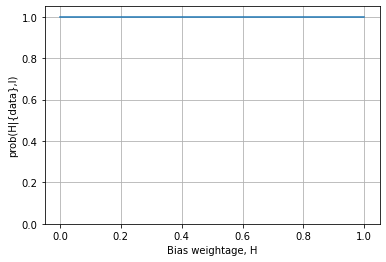

In [109]:
#no data
r=0
n=0
x=np.linspace(0,1,100)
post=[posterior(x,r,n) for x in x]
plt.plot(x,post)
plt.ylim(0,1.05)
plt.ylabel("prob(H|{data},I)")
plt.xlabel("Bias weightage, H")
plt.grid()
plt.show()

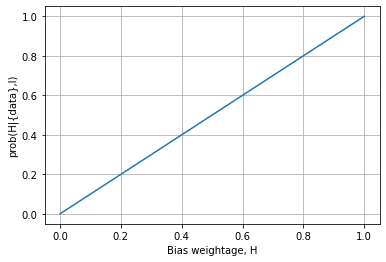

In [110]:
r=1 #tossed once and we get a head
n=1
post=[posterior(x,r,n) for x in x]
plt.plot(x,post)
plt.ylabel("prob(H|{data},I)")
plt.xlabel("Bias weightage, H")
plt.grid()
plt.show()

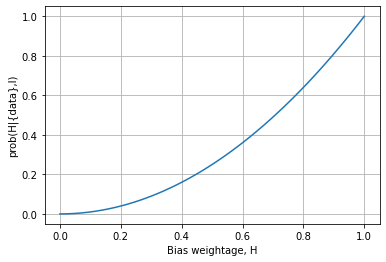

In [111]:
r=2 #tossed twice and we get both heads, coin is def not double tailed
n=2
post=[posterior(x,r,n) for x in x]
plt.plot(x,post)
plt.ylabel("prob(H|{data},I)")
plt.xlabel("Bias weightage, H")
plt.grid()
plt.show()

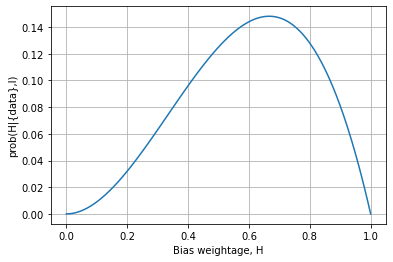

In [112]:
r=2 #tossed twice and we get 2 heads 1 tail, coin is also not double head
n=3
post=[posterior(x,r,n) for x in x]
plt.plot(x,post)
plt.ylabel("prob(H|{data},I)")
plt.xlabel("Bias weightage, H")
plt.grid()
plt.show()

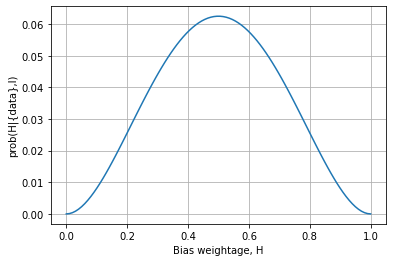

In [113]:
r=2 #tossed four times and we get 2 heads 2 tails, likely to be fair coin but still uncertain 
n=4
post=[posterior(x,r,n) for x in x]
plt.plot(x,post)
plt.ylabel("prob(H|{data},I)")
plt.xlabel("Bias weightage, H")
plt.grid()
plt.show()

# Parameter estimation-II
##  Generation of data $N_k$

### Building a gaussian model $D_k$ of k data points. D is a function of parameters A,B and the points $x_k$ (our measurement variable). A is the amplitude peak of the data and B is the information of the background. Based on this $D_k$ we stimulate our data points $N_k$
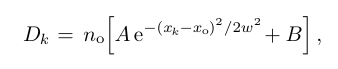


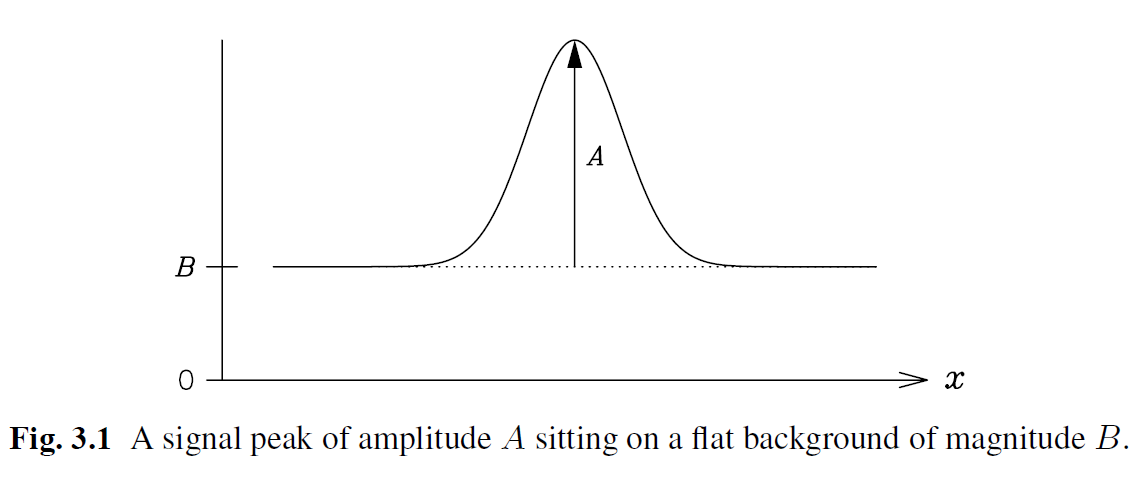

# CASE-I

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import scipy.special

15 data bins, n0 was chosen to give a maximum expectation of 100 counts.
At x0=0 and xk=0, A=1, B=2, given D=100, thus n=33.33.


prior is the probability that A and B are true thus it should take a value between 0 and 1

[-7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.]


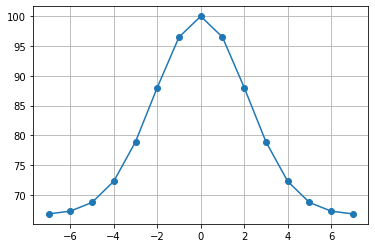

In [2]:
A=1 
B=2 
x0=0
w=2.12 #FWHM 5, FWHM=2.36*sigma
n0=33.33
xk=np.linspace(-7,7,15) #bin width unity 
prior=1e-3 
print(xk)
Dk=n0*(A*(m.e**(-((xk-x0)**2)/(2*w**2))) +B)
plt.plot(xk,Dk, '-o')
plt.grid()
plt.show()

In [3]:
Dk

array([66.80302007, 67.26742529, 68.72518336, 72.28074947, 78.90615362,
       88.01871114, 96.48086563, 99.99      , 96.48086563, 88.01871114,
       78.90615362, 72.28074947, 68.72518336, 67.26742529, 66.80302007])

## Generation of random points $N_k$ following a poisson distribution such that at every point its peak is that of $D_k$ of that point
Poisson distribution pdf
$$P(x)=\frac{\lambda^{x}e^{-\lambda}}{x!} $$

Likelihood function
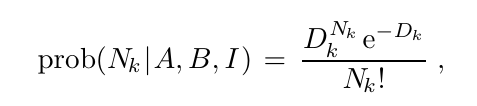

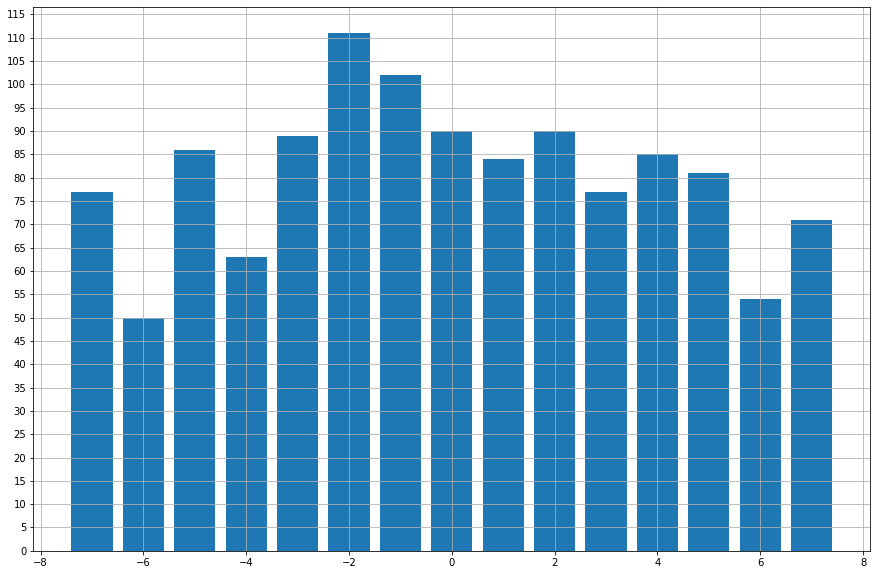

In [4]:
plt.figure(figsize=(15,10))
Nk=np.random.poisson(Dk)
plt.grid()
plt.bar(xk,Nk)
plt.yticks(np.arange(0,120,5))
plt.show()

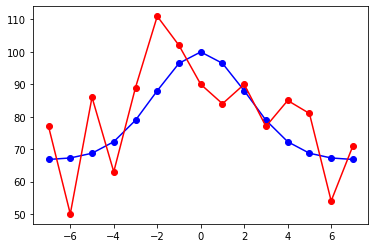

In [5]:
plt.plot(xk,Dk,'-bo')
plt.plot(xk,Nk,'-ro')
plt.show()

In [6]:
len(Nk)

15

In [7]:
# for i in range(len(xk)):
#     print(r'{0:>4.2f} {1:>6.2f} {2:>6.2f}'.format(xk[i], Dk[i], Nk[i]))

## Inference of the data

Now we assume that we don't know what our A and B are. Provided we have received a data ($N_k$ representing let's say the luminosity as a function of frequency, xk), we need to find the probability that we get that value of luminosity at a particular frequency given we have a model $D_k$. So we give an array of A and B hoping the range covers the actual value and using this we find the correspoding two dimensional posterior which is a function of these A and B values. We plot a contour function which will give us a peak corresponding to the actual A and B of the data. The posterior tells us about the probability that A and B values are correct for a given data point. On plotting we find the best value of the parameters, which will be close to the actual ones. 

Since we now have our A and B values we know which model will suit our data the best, using this we can do further analysis

Giving flat prior
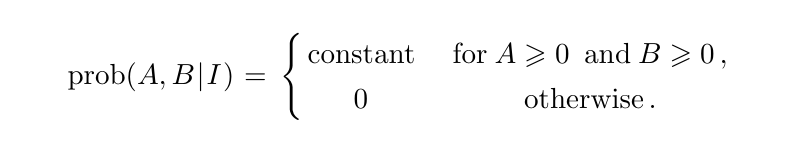

POsterior will be
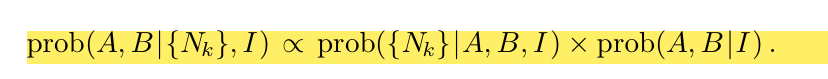

In [8]:
A=np.linspace(0,3,300) #A=1
B=np.linspace(0,3,300) #B=2
posterior=np.zeros((len(A),len(B)))
for b in range(0,len(B)): 
    for a in range(0,len(A)):
        #print("A= ", A[a], "B= ", B[b])
        dk=np.array([n0*(A[a]*(m.e**(-((xk[i]-x0)**2)/(2*w**2))) +B[b]) for i in range(0,len(xk))])
        likelihood=(dk**Nk)*m.e**(-dk)/scipy.special.factorial(Nk)
        like=np.prod(likelihood)
        #print("likelihood is: ", np.mean(likelihood))
        posterior[a,b]=like*prior

we get a diamond shape for small values of A and B

For float values the graph shifts, (pg 39)

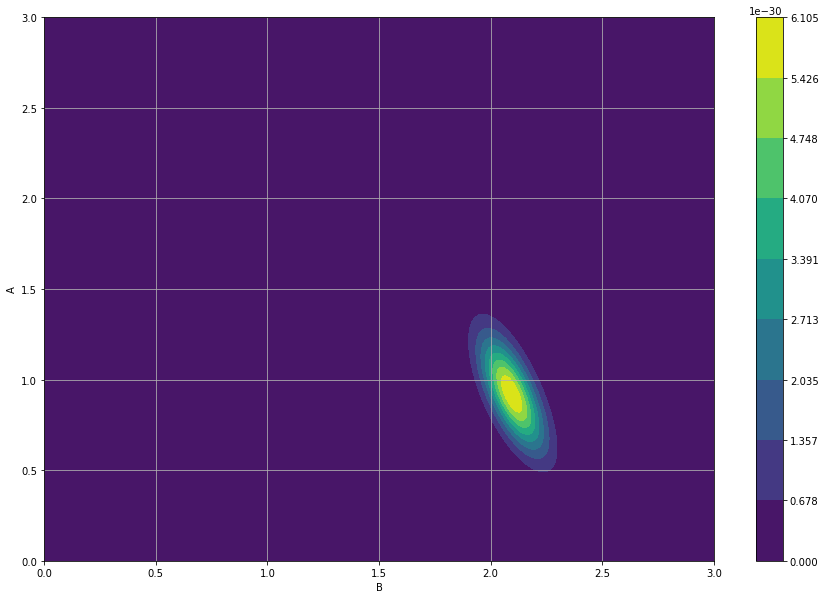

In [9]:
plt.figure(figsize=(15,10))
plt.grid()
plt.contourf(A,B,posterior, levels=np.linspace(np.amin(posterior),np.amax(posterior),10))
plt.xlabel("B")
plt.ylabel("A")
plt.colorbar()
plt.show()

C:\Users\pankh\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:1767: RuntimeWarning: divide by zero encountered in true_divide
  shade = ((normals / np.linalg.norm(normals, axis=1, keepdims=True))


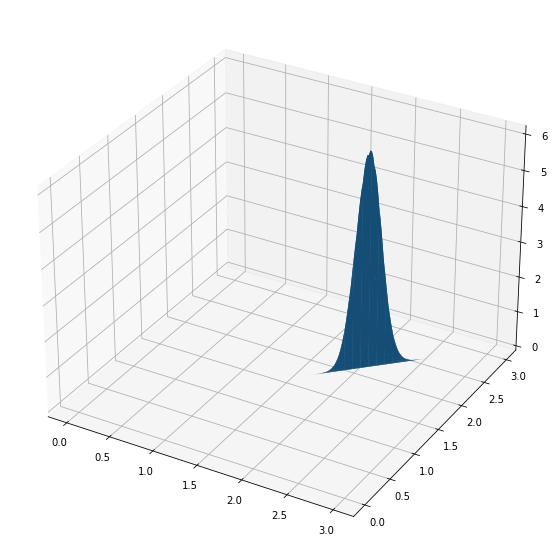

In [10]:
plt.figure(figsize=(10,10))
ax=plt.axes(projection ='3d')
ax.plot_surface(A,B,posterior)
plt.show()

## CASE-I  (marginalization)

## Marginalization
matrix= AXB, with A rows and B columns. For marginalizing B we integrate over all column values. We end up with a row matrix

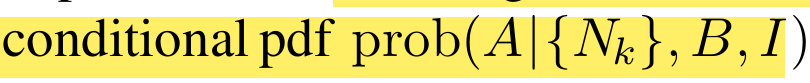

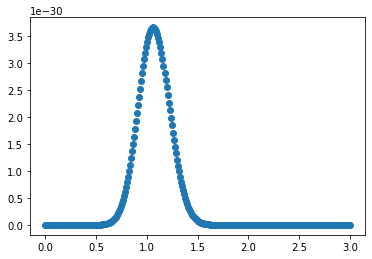

In [12]:
#conditional 
B=2
A=np.linspace(0,3,300)
posterior=[]
for a in A:
    dk=np.array([n0*(a*(m.e**(-((xk[i]-x0)**2)/(2*w**2))) +B) for i in range(0,len(xk))])
    likelihood=(dk**Nk)*m.e**(-dk)/scipy.special.factorial(Nk)
    like=np.prod(likelihood)
    posterior.append(like*prior)
plt.scatter(A,posterior)

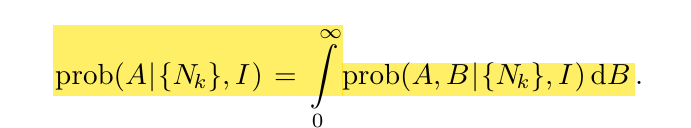

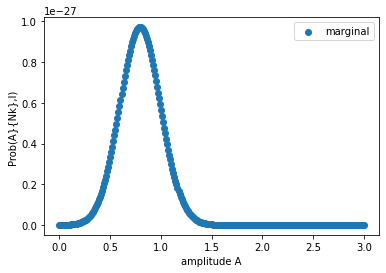

In [12]:
marginal=[] 
xk=np.linspace(0,3,300)
import scipy.integrate
for i in range(0,len(B)):
    marginal.append(scipy.integrate.simpson(posterior[i],xk))
plt.scatter(xk,marginal,label="marginal")
#plt.scatter(A,posterior,label="conditional")
plt.xlabel("amplitude A")
plt.ylabel("Prob(A}{Nk},I)")
plt.legend()
plt.show()

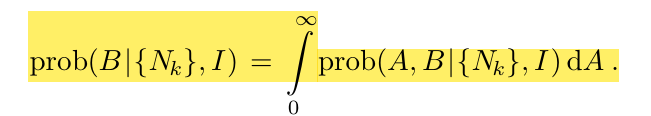

Text(0, 0.5, 'Prob(B|{Nk},I)')

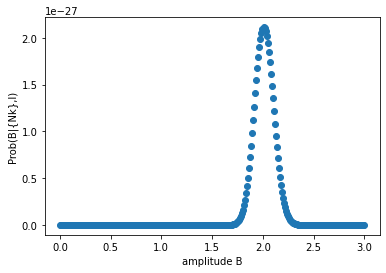

In [13]:
marginal=[] 
xk=np.linspace(0,3,300)
import scipy.integrate
for i in range(0,len(B)):
    marginal.append(scipy.integrate.simpson(posterior.T[i],xk))
plt.scatter(xk,marginal)
plt.xlabel("amplitude B")
plt.ylabel("Prob(B|{Nk},I)")

On changing range of A and B, we get closer to correct value of B. And on change xk range, uncertainty in A decreases. On increasing number of data points for A and B we get a smoother contour 

# CASE-II: n0 changed

[-7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.]


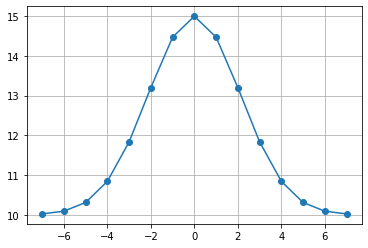

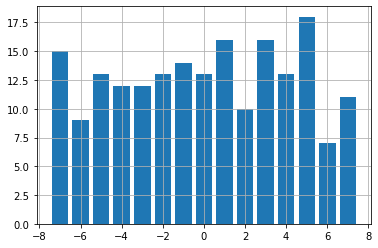

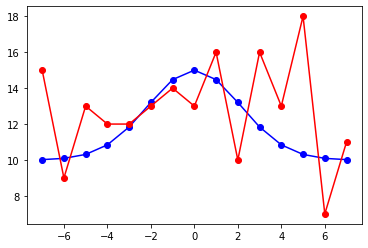

In [17]:
A=1 
B=2 
x0=0
w=2.12
n0=5
xk=np.linspace(-7,7,15)
prior=1e-3 
print(xk)
Dk=n0*(A*(m.e**(-((xk-x0)**2)/(2*w**2))) +B)
plt.plot(xk,Dk, '-o')
plt.grid()
plt.show()

Nk=np.random.poisson(Dk)
plt.grid()
plt.bar(xk,Nk)
plt.show()

plt.plot(xk,Dk,'-bo')
plt.plot(xk,Nk,'-ro')
plt.show()


In [18]:
A=np.linspace(0,3,200) 
B=np.linspace(0,3,200)  
posterior=np.zeros((len(A),len(B)))
for b in range(0,len(B)):
    for a in range(0,len(A)):
        #print("A= ", A[a], "B= ", B[b])
        dk=np.array([n0*(A[a]*(m.e**(-((xk[i]-x0)**2)/(2*w**2))) +B[b]) for i in range(0,len(xk))])
        likelihood=(dk**Nk)*m.e**(-dk)/scipy.special.factorial(Nk)
        like=np.prod(likelihood)
        #print("likelihood is: ", np.mean(likelihood))
        posterior[a,b]=like*prior
        

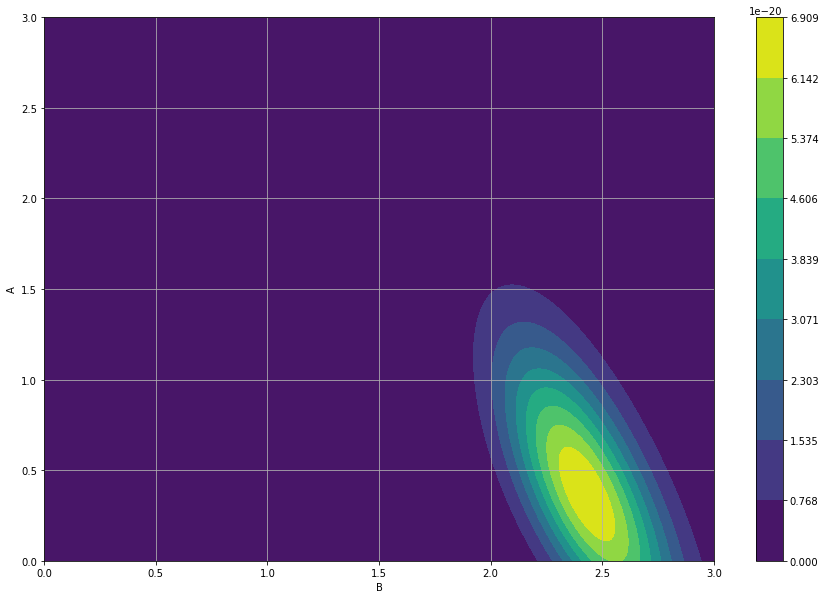

In [19]:
plt.figure(figsize=(15,10))
plt.grid()
plt.contourf(A,B,posterior,levels=np.linspace(np.amin(posterior),np.amax(posterior),10))
plt.xlabel("B")
plt.ylabel("A")
plt.colorbar()
plt.show()

C:\Users\pankh\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:1767: RuntimeWarning: divide by zero encountered in true_divide
  shade = ((normals / np.linalg.norm(normals, axis=1, keepdims=True))


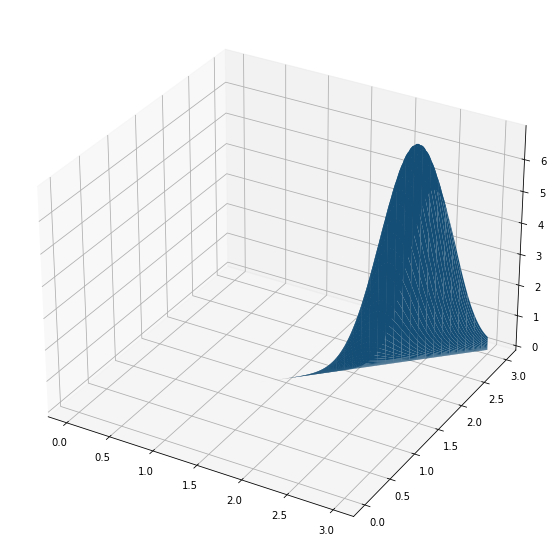

In [20]:
plt.figure(figsize=(10,10))
ax=plt.axes(projection ='3d')
ax.plot_surface(A,B,posterior)
plt.show()

## CASE-II (marginalization)

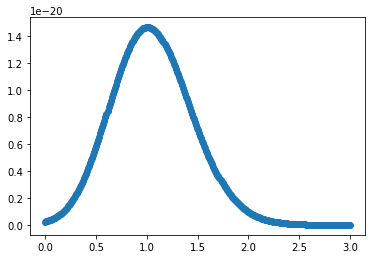

In [21]:
#conditional 
B=2
A=np.linspace(0,3,300)
posterior=[]
for a in A:
    dk=np.array([n0*(a*(m.e**(-((xk[i]-x0)**2)/(2*w**2))) +B) for i in range(0,len(xk))])
    likelihood=(dk**Nk)*m.e**(-dk)/scipy.special.factorial(Nk)
    like=np.prod(likelihood)
    posterior.append(like*prior)
plt.scatter(A,posterior)

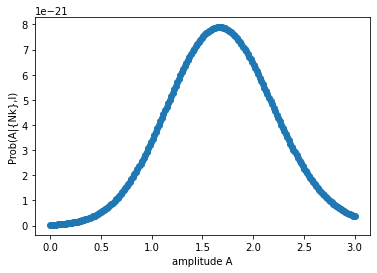

In [25]:
marginal=[] 
xk=np.linspace(0,3,len(posterior))
import scipy.integrate
for i in range(0,len(B)):
    marginal.append(scipy.integrate.simpson(posterior[i],xk))
plt.scatter(xk,marginal)
plt.xlabel("amplitude A")
plt.ylabel("Prob(A|{Nk},I)")
plt.show()

Text(0, 0.5, 'Prob(B|{Nk},I)')

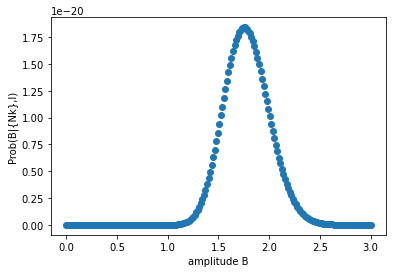

In [26]:
marginal=[] 
xk=np.linspace(0,3,len(posterior))
import scipy.integrate
for i in range(0,len(B)):
    marginal.append(scipy.integrate.simpson(posterior.T[i],xk))
plt.scatter(xk,marginal)
plt.xlabel("amplitude B")
plt.ylabel("Prob(B|{Nk},I)")

# CASE-III: Increasing xk range

[-13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.
   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.]


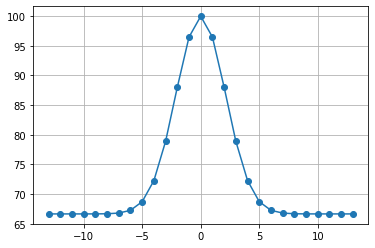

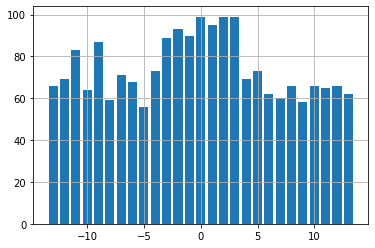

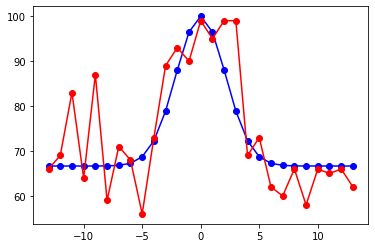

In [22]:
A=1 
B=2 
x0=0
w=2.12
n0=33.33
xk=np.linspace(-13,13,27)
prior=1e-3 
print(xk)
Dk=n0*(A*(m.e**(-((xk-x0)**2)/(2*w**2))) +B)
plt.plot(xk,Dk, '-o')
plt.grid()
plt.show()

Nk=np.random.poisson(Dk)
plt.grid()
plt.bar(xk,Nk)
plt.show()

plt.plot(xk,Dk,'-bo')
plt.plot(xk,Nk,'-ro')
plt.show()


In [23]:
A=np.linspace(0,3,200) 
B=np.linspace(0,3,200)  
posterior=np.zeros((len(A),len(B)))
for b in range(0,len(B)):
    for a in range(0,len(A)):
        #print("A= ", A[a], "B= ", B[b])
        dk=np.array([n0*(A[a]*(m.e**(-((xk[i]-x0)**2)/(2*w**2))) +B[b]) for i in range(0,len(xk))])
        likelihood=(dk**Nk)*m.e**(-dk)/scipy.special.factorial(Nk)
        like=np.prod(likelihood)
        #print("likelihood is: ", np.mean(likelihood))
        posterior[a,b]=like*prior
        

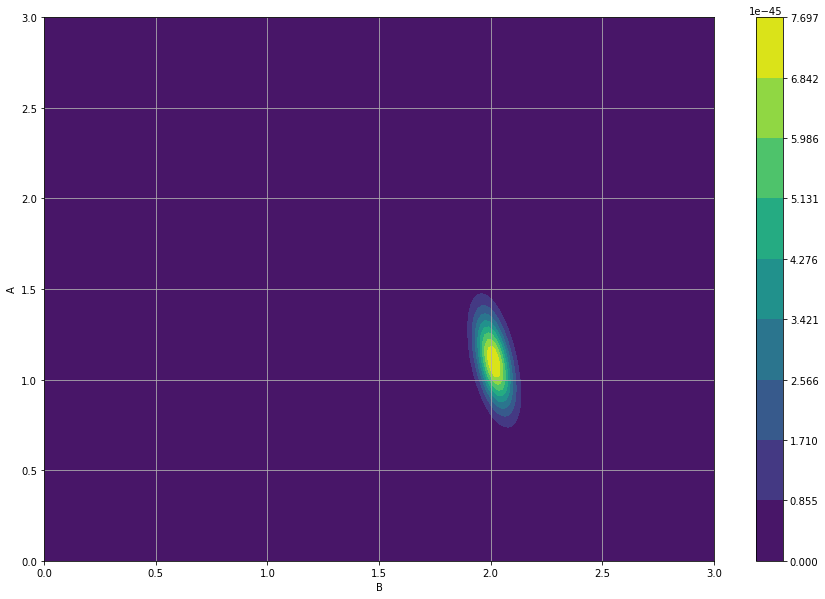

In [24]:
plt.figure(figsize=(15,10))
plt.grid()
plt.contourf(A,B,posterior,levels=np.linspace(np.amin(posterior),np.amax(posterior),10))
plt.xlabel("B")
plt.ylabel("A")
plt.colorbar()
plt.show()

C:\Users\pankh\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:1767: RuntimeWarning: divide by zero encountered in true_divide
  shade = ((normals / np.linalg.norm(normals, axis=1, keepdims=True))


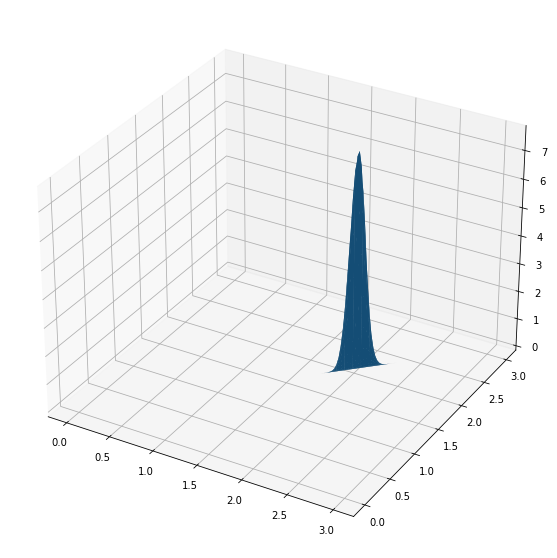

In [25]:
plt.figure(figsize=(10,10))
ax=plt.axes(projection ='3d')
ax.plot_surface(A,B,posterior)
plt.show()

## CASE-III (marginalization)

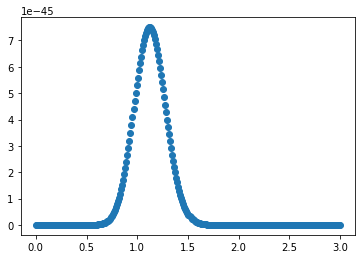

In [26]:
#conditional 
B=2
A=np.linspace(0,3,300)
posterior=[]
for a in A:
    dk=np.array([n0*(a*(m.e**(-((xk[i]-x0)**2)/(2*w**2))) +B) for i in range(0,len(xk))])
    likelihood=(dk**Nk)*m.e**(-dk)/scipy.special.factorial(Nk)
    like=np.prod(likelihood)
    posterior.append(like*prior)
plt.scatter(A,posterior)

Text(0, 0.5, 'Prob(A|{Nk},I)')

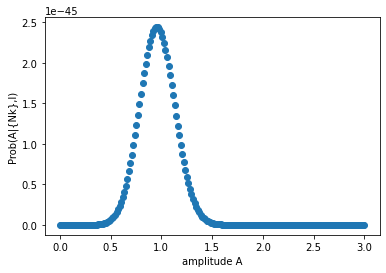

In [37]:
marginal=[] 
xk=np.linspace(0,3,len(posterior))
import scipy.integrate
for i in range(0,len(B)):
    marginal.append(scipy.integrate.simpson(posterior[i],xk))
plt.scatter(xk,marginal)
plt.xlabel("amplitude A")
plt.ylabel("Prob(A|{Nk},I)")

Text(0, 0.5, 'Prob(B|{Nk},I)')

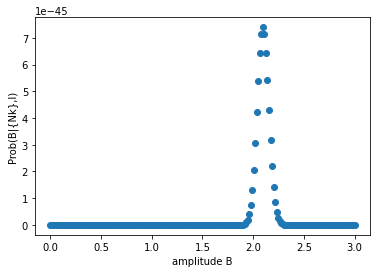

In [38]:
marginal=[] 
xk=np.linspace(0,3,len(posterior))
import scipy.integrate
for i in range(0,len(B)):
    marginal.append(scipy.integrate.simpson(posterior.T[i],xk))
plt.scatter(xk,marginal)
plt.xlabel("amplitude B")
plt.ylabel("Prob(B|{Nk},I)")

# CASE-IV: decreasing xk range, correlation between A and B observed 

[-3. -2. -1.  0.  1.  2.  3.]


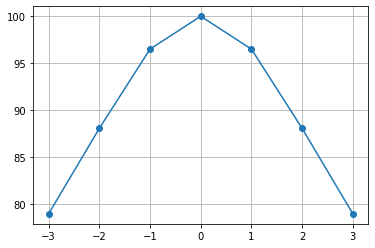

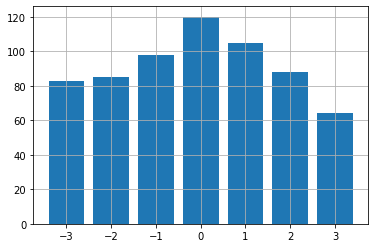

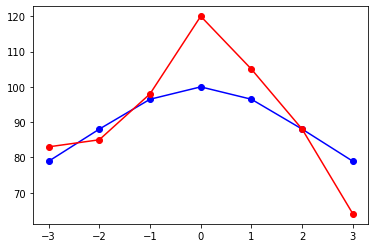

In [27]:
A=1 
B=2 
x0=0
w=2.12
n0=33.33
xk=np.linspace(-3,3,7)
prior=1e-3 
print(xk)
Dk=n0*(A*(m.e**(-((xk-x0)**2)/(2*w**2))) +B)
plt.plot(xk,Dk, '-o')
plt.grid()
plt.show()

Nk=np.random.poisson(Dk)
plt.grid()
plt.bar(xk,Nk)
plt.show()

plt.plot(xk,Dk,'-bo')
plt.plot(xk,Nk,'-ro')
plt.show()


In [28]:
A=np.linspace(0,3,200) 
B=np.linspace(0,3,200)  
posterior=np.zeros((len(A),len(B)))
for b in range(0,len(B)):
    for a in range(0,len(A)):
        #print("A= ", A[a], "B= ", B[b])
        dk=np.array([n0*(A[a]*(m.e**(-((xk[i]-x0)**2)/(2*w**2))) +B[b]) for i in range(0,len(xk))])
        likelihood=(dk**Nk)*m.e**(-dk)/scipy.special.factorial(Nk)
        like=np.prod(likelihood)
        #print("likelihood is: ", np.mean(likelihood))
        posterior[a,b]=like*prior
        

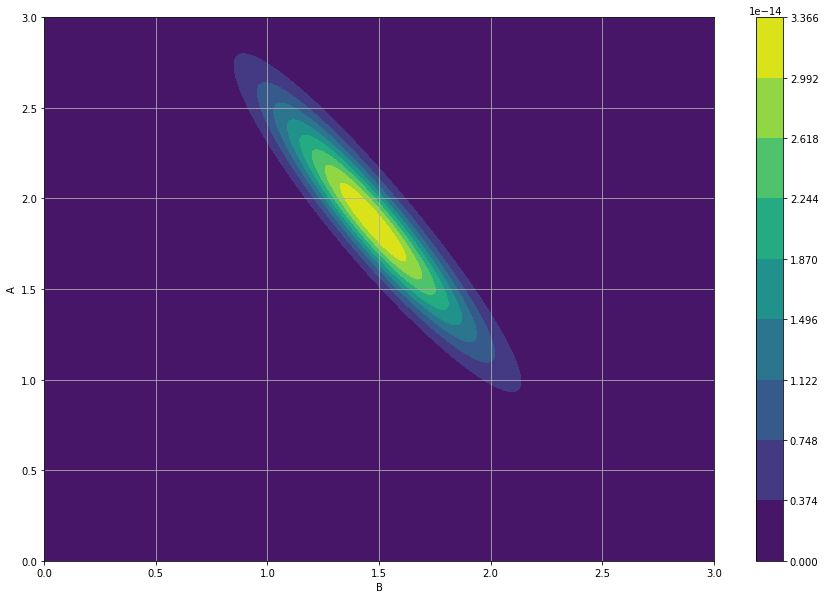

In [29]:
plt.figure(figsize=(15,10))
plt.grid()
plt.contourf(A,B,posterior,levels=np.linspace(np.amin(posterior),np.amax(posterior),10))
plt.xlabel("B")
plt.ylabel("A")
plt.colorbar()
plt.show()

C:\Users\pankh\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:1767: RuntimeWarning: divide by zero encountered in true_divide
  shade = ((normals / np.linalg.norm(normals, axis=1, keepdims=True))


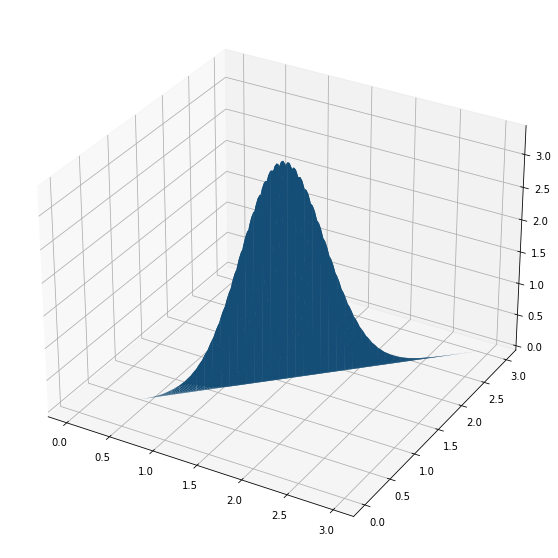

In [30]:
plt.figure(figsize=(10,10))
ax=plt.axes(projection ='3d')
ax.plot_surface(A,B,posterior)
plt.show()

## CASE-IV

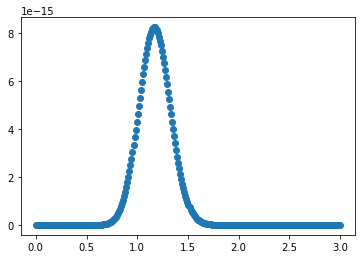

In [31]:
#conditional 
B=2
A=np.linspace(0,3,300)
posterior=[]
for a in A:
    dk=np.array([n0*(a*(m.e**(-((xk[i]-x0)**2)/(2*w**2))) +B) for i in range(0,len(xk))])
    likelihood=(dk**Nk)*m.e**(-dk)/scipy.special.factorial(Nk)
    like=np.prod(likelihood)
    posterior.append(like*prior)
plt.scatter(A,posterior)

Text(0, 0.5, 'Prob(A|{Nk},I)')

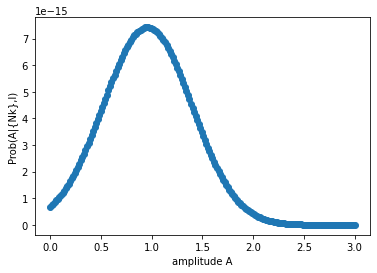

In [49]:
marginal=[] 
xk=np.linspace(0,3,len(posterior))
import scipy.integrate
for i in range(0,len(B)):
    marginal.append(scipy.integrate.simpson(posterior[i],xk))
plt.scatter(xk,marginal)
plt.xlabel("amplitude A")
plt.ylabel("Prob(A|{Nk},I)")

Text(0, 0.5, 'Prob(B|{Nk},I)')

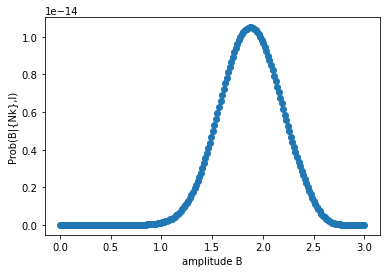

In [50]:
marginal=[] 
xk=np.linspace(0,3,len(posterior))
import scipy.integrate
for i in range(0,len(B)):
    marginal.append(scipy.integrate.simpson(posterior.T[i],xk))
plt.scatter(xk,marginal)
plt.xlabel("amplitude B")
plt.ylabel("Prob(B|{Nk},I)")

# Various Binnings

[-7.         -6.76271186 -6.52542373 -6.28813559 -6.05084746 -5.81355932
 -5.57627119 -5.33898305 -5.10169492 -4.86440678 -4.62711864 -4.38983051
 -4.15254237 -3.91525424 -3.6779661  -3.44067797 -3.20338983 -2.96610169
 -2.72881356 -2.49152542 -2.25423729 -2.01694915 -1.77966102 -1.54237288
 -1.30508475 -1.06779661 -0.83050847 -0.59322034 -0.3559322  -0.11864407
  0.11864407  0.3559322   0.59322034  0.83050847  1.06779661  1.30508475
  1.54237288  1.77966102  2.01694915  2.25423729  2.49152542  2.72881356
  2.96610169  3.20338983  3.44067797  3.6779661   3.91525424  4.15254237
  4.38983051  4.62711864  4.86440678  5.10169492  5.33898305  5.57627119
  5.81355932  6.05084746  6.28813559  6.52542373  6.76271186  7.        ]


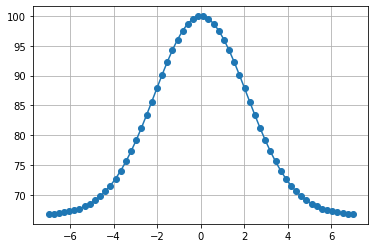

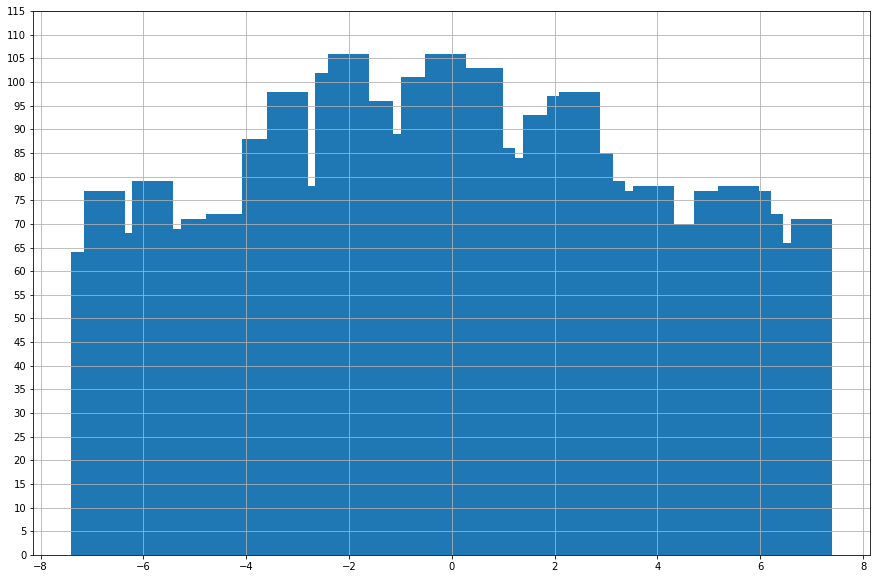

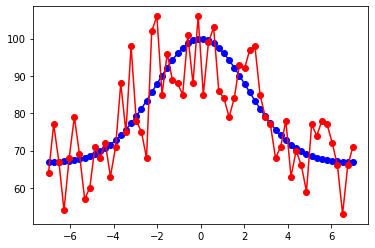

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import scipy.special


A=1 
B=2 
x0=0
w=2.12 #FWHM 5, FWHM=2.36*sigma
n0=33.33
xk=np.linspace(-7,7,60) #bin four times narrower 
prior=1e-3 
print(xk)
Dk=n0*(A*(m.e**(-((xk-x0)**2)/(2*w**2))) +B)
plt.plot(xk,Dk, '-o')
plt.grid()
plt.show()


plt.figure(figsize=(15,10))
Nk=np.random.poisson(Dk)
plt.grid()
plt.bar(xk,Nk)
plt.yticks(np.arange(0,120,5))
plt.show()

plt.plot(xk,Dk,'-bo')
plt.plot(xk,Nk,'-ro')
plt.show()



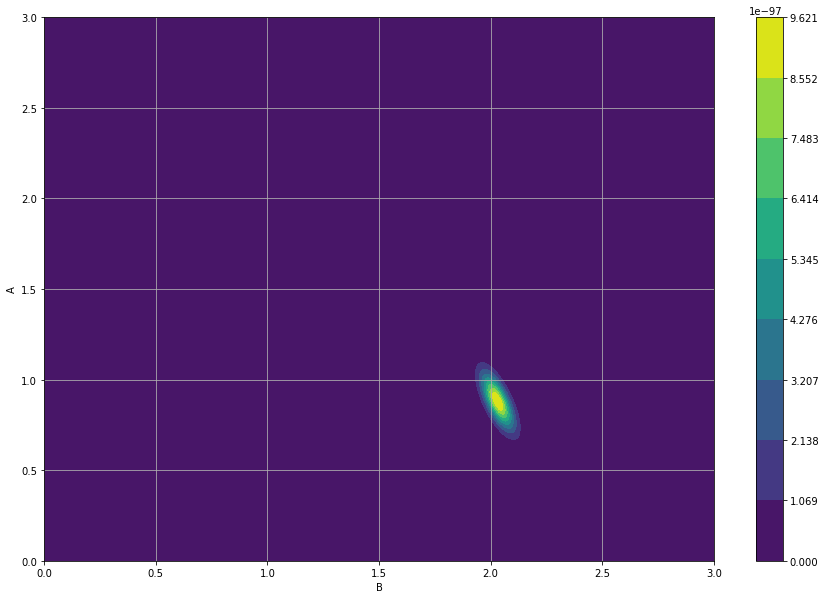

In [2]:

A=np.linspace(0,3,300) #A=1
B=np.linspace(0,3,300) #B=2
posterior=np.zeros((len(A),len(B)))
for b in range(0,len(B)): 
    for a in range(0,len(A)):
        #print("A= ", A[a], "B= ", B[b])
        dk=np.array([n0*(A[a]*(m.e**(-((xk[i]-x0)**2)/(2*w**2))) +B[b]) for i in range(0,len(xk))])
        likelihood=(dk**Nk)*m.e**(-dk)/scipy.special.factorial(Nk)
        like=np.prod(likelihood)
        #print("likelihood is: ", np.mean(likelihood))
        posterior[a,b]=like*prior

plt.figure(figsize=(15,10))
plt.grid()
plt.contourf(A,B,posterior, levels=np.linspace(np.amin(posterior),np.amax(posterior),10))
plt.xlabel("B")
plt.ylabel("A")
plt.colorbar()
plt.show()


C:\Users\pankh\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:1767: RuntimeWarning: divide by zero encountered in true_divide
  shade = ((normals / np.linalg.norm(normals, axis=1, keepdims=True))


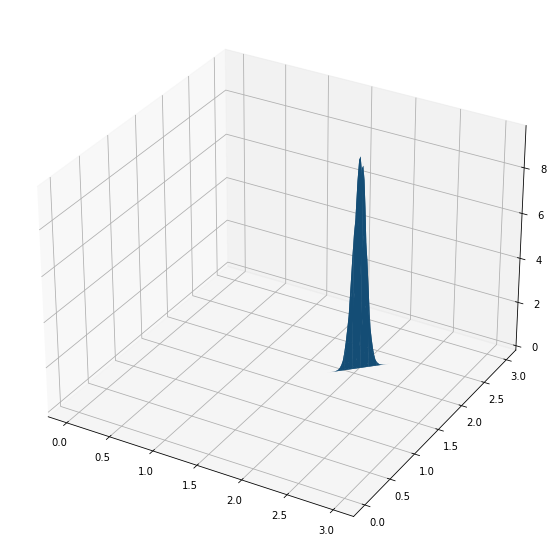

In [3]:
plt.figure(figsize=(10,10))
ax=plt.axes(projection ='3d')
ax.plot_surface(A,B,posterior)
plt.show()


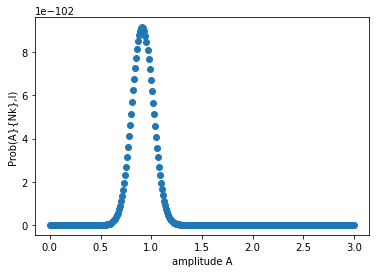

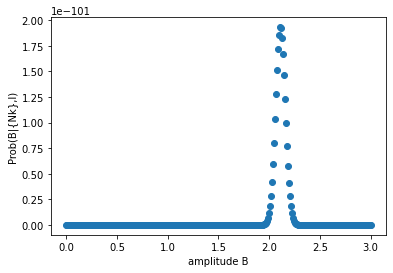

In [12]:

marginal=[] 
xk=np.linspace(0,3,300)
import scipy.integrate
for i in range(0,len(B)):
    marginal.append(scipy.integrate.simpson(posterior[i],xk))
plt.scatter(xk,marginal,label="marginal")
#plt.scatter(A,posterior,label="conditional")
plt.xlabel("amplitude A")
plt.ylabel("Prob(A}{Nk},I)")
plt.show()

marginal=[] 
xk=np.linspace(0,3,300)
import scipy.integrate
for i in range(0,len(B)):
    marginal.append(scipy.integrate.simpson(posterior.T[i],xk))
plt.scatter(xk,marginal)
plt.xlabel("amplitude B")
plt.ylabel("Prob(B|{Nk},I)")
plt.show()

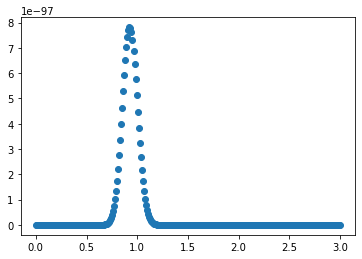

In [4]:
#conditional 
B=2
A=np.linspace(0,3,300)
posterior=[]
for a in A:
    dk=np.array([n0*(a*(m.e**(-((xk[i]-x0)**2)/(2*w**2))) +B) for i in range(0,len(xk))])
    likelihood=(dk**Nk)*m.e**(-dk)/scipy.special.factorial(Nk)
    like=np.prod(likelihood)
    posterior.append(like*prior)
plt.scatter(A,posterior)

In [47]:
from scipy.optimize import curve_fit

def gauss(x, A, mu, sig):
    return A*np.exp(-0.5*((x-mu)/sig)**2)

popt, pcov = curve_fit(gauss, x, y)

In [49]:
popt, np.sqrt(np.abs(np.diag(pcov)))

(array([317.65747344,   2.29113809,   0.58137902]),
 array([2.95249796, 0.00623971, 0.00623971]))

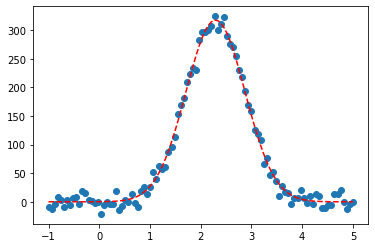

In [50]:
plt.plot(x,y, 'o')
plt.plot(x, gauss(x, *popt), '--r')
plt.show()

In [14]:
#IGNORE THIS CODE
A=np.linspace(0.1,3,100) 
B=np.linspace(0.1,3,100)  
#posterior=np.zeros((len(A),len(B)))
sum=np.zeros((len(A),len(B)))
for b in range(0,len(B)):
    for a in range(0,len(A)):
        dk=np.array([n0*(A[a]*(m.e**(-((xk[i]-x0)**2)/(2*w**2))) +B[b]) for i in range(0,len(xk))])
        #sum[a,b]=np.sum(Nk*np.log(dk)-dk-np.log(scipy.special.factorial(Nk)))+np.log(prior)
        sum[a,b]=np.sum(Nk*np.log(dk)-dk)

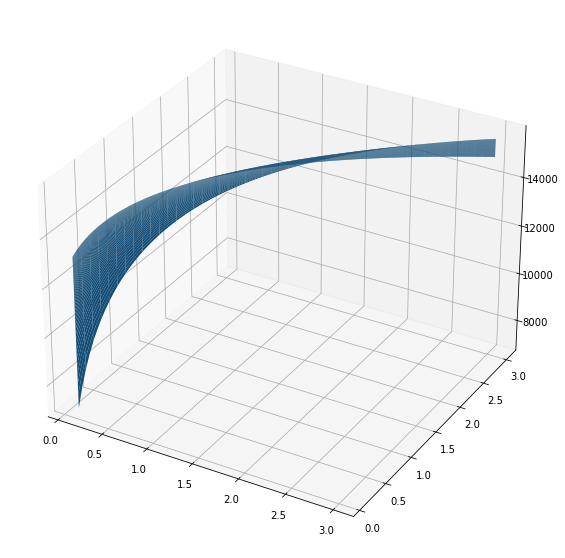

In [15]:
plt.figure(figsize=(10,10))
ax=plt.axes(projection ='3d')
ax.plot_surface(A,B,sum)
plt.show()

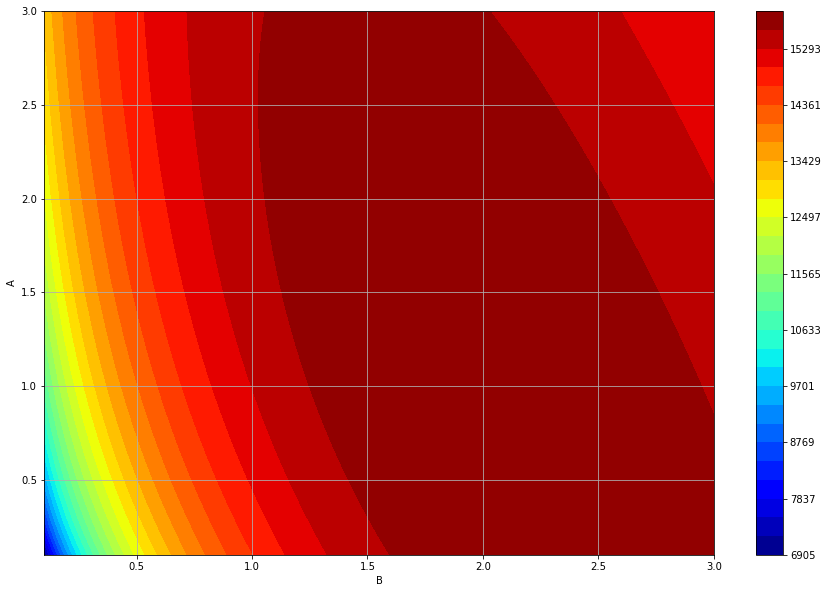

In [16]:
plt.figure(figsize=(15,10))
plt.grid()
plt.contourf(A,B,sum,levels=np.linspace(np.amin(sum),np.amax(sum),30),cmap='jet')
plt.xlabel("B")
plt.ylabel("A")
plt.colorbar()
plt.show()